In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
import tweepy
from collections import Counter
from tqdm import tqdm
from time import sleep

In [42]:
path_to_dataset = Path(os.getcwd()).parent / 'data' / 'iSarcasmEval'
path_to_train = path_to_dataset / 'train'
path_to_test = path_to_dataset / 'test`'

In [48]:
train = pd.read_csv(path_to_train / 'train.En.csv')
# train.shape
train.head()

,Unnamed: 0,tweet,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
0,0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",0.0,1.0,0.0,0.0,0.0,0.0
1,1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,1.0,0.0,0.0,0.0,0.0,0.0
2,2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",0.0,1.0,0.0,0.0,0.0,0.0
3,3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",1.0,0.0,0.0,0.0,0.0,0.0
4,4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...,1.0,0.0,0.0,0.0,0.0,0.0


In [51]:
preprocessing_frame = train.copy()
all_columns = preprocessing_frame.columns.tolist()
remove_columns = [column for column in all_columns if column != 'tweet' and column != 'sarcastic']
preprocessing_frame.drop(remove_columns, axis=1, inplace=True)
# Row 1062 has a nan and we want to drop the error
preprocessing_frame.dropna(inplace=True)
# preprocessing_frame.drop(preprocessing_frame.columns[remove_columns], axis=1, inplace=True)
preprocessing_frame.head()
# preprocessing_frame.shape

,tweet,sarcastic
0,The only thing I got from college is a caffein...,1
1,I love it when professors draw a big question ...,1
2,Remember the hundred emails from companies whe...,1
3,Today my pop-pop told me I was not “forced” to...,1
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1


### Frequently occuring words

In [38]:
from nltk.tokenize import word_tokenize
from collections import defaultdict

In [62]:
tokenized_df = preprocessing_frame.copy()
# type(tokenized_df['tweet'][0])
# def split_str(string):
#     return string.split()

# tokenized_df['tweet'].apply(split_str)

# tokenized_df.head()
li = tokenized_df['tweet'].to_list()
types = defaultdict(int)
for idx, elem in enumerate(li):
    types[type(elem)] += 1
    if type(elem) == float:
        print(elem, idx)

print(types)

tokenized_df['tweet'] = tokenized_df['tweet'].apply(word_tokenize)
tokenized_df.head()

defaultdict(<class 'int'>, {<class 'str'>: 3467})


,tweet,sarcastic
0,"[The, only, thing, I, got, from, college, is, ...",1
1,"[I, love, it, when, professors, draw, a, big, ...",1
2,"[Remember, the, hundred, emails, from, compani...",1
3,"[Today, my, pop-pop, told, me, I, was, not, “,...",1
4,"[@, VolphanCarol, @, littlewhitty, @, mystical...",1


3467
[414 904 780 565 337 164 130  98  51  24]


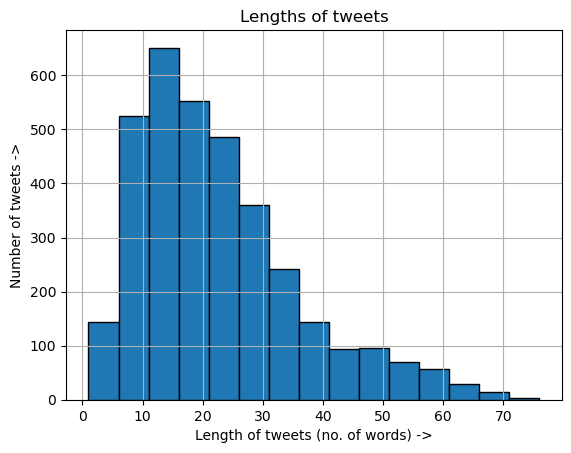

In [94]:
tweet_lengths = [len(elem) for elem in tokenized_df['tweet']]
print(len(tweet_lengths))
hist_ = np.histogram(tweet_lengths)
print(hist_[0])
# Plotting historgram
binwidth = 5
plt.hist(tweet_lengths, bins=range(min(tweet_lengths), max(tweet_lengths) + binwidth, binwidth), edgecolor="black")
plt.ylabel("Number of tweets ->")
plt.xlabel("Length of tweets (no. of words) ->")
plt.title('Lengths of tweets')
plt.grid()
plt.show()

In [76]:
from nltk.corpus import stopwords
import string
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def stop_word_remover(sentence):
    return [word for word in sentence if word.lower() not in stop_words] # and word.lower() not in punctuation


tokenized_df['filtered'] = tokenized_df['tweet'].apply(stop_word_remover)
tokenized_df.head()

,tweet,sarcastic,filtered
0,"[The, only, thing, I, got, from, college, is, ...",1,"[thing, got, college, caffeine, addiction]"
1,"[I, love, it, when, professors, draw, a, big, ...",1,"[love, professors, draw, big, question, mark, ..."
2,"[Remember, the, hundred, emails, from, compani...",1,"[Remember, hundred, emails, companies, Covid, ..."
3,"[Today, my, pop-pop, told, me, I, was, not, “,...",1,"[Today, pop-pop, told, “, forced, ”, go, colle..."
4,"[@, VolphanCarol, @, littlewhitty, @, mystical...",1,"[@, VolphanCarol, @, littlewhitty, @, mystical..."


In [77]:
def keyword_extractor(sentences):
    keywords = defaultdict(int)
    for sentence in sentences:
        for word in sentence:
            keywords[word] += 1
    return keywords
    
keywords = keyword_extractor(tokenized_df['filtered'])

In [78]:
from pprint import pprint
pprint(f"Number of unique words found: {len(list(keywords.keys()))}")
ordered_keywords = sorted(keywords.items(), key=lambda x: x[1], reverse=True)
pprint(ordered_keywords)

'Number of unique words found: 12501'
[('.', 1841),
 (',', 1254),
 ('’', 1148),
 ('@', 848),
 ('!', 726),
 ('#', 605),
 ('?', 589),
 (':', 544),
 ('https', 283),
 ("'s", 261),
 ('like', 254),
 ("n't", 196),
 ('get', 195),
 ('time', 191),
 ('love', 183),
 ('one', 180),
 ('people', 176),
 ('day', 147),
 (')', 141),
 ('really', 140),
 ('”', 138),
 ('(', 137),
 ('“', 136),
 ("'m", 132),
 ('think', 127),
 (';', 126),
 ('today', 114),
 ('good', 114),
 ('...', 113),
 ('know', 113),
 ('&', 113),
 ("''", 112),
 ('going', 112),
 ('would', 111),
 ('got', 108),
 ('life', 106),
 ('``', 105),
 ('much', 102),
 ('go', 98),
 ('see', 97),
 ("'ve", 94),
 ('back', 91),
 ('work', 91),
 ('want', 90),
 ('new', 88),
 ('amp', 88),
 ('never', 87),
 ('first', 87),
 ('-', 86),
 ('year', 85),
 ('need', 80),
 ('feel', 75),
 ('thing', 72),
 ('every', 72),
 ('still', 72),
 ('last', 71),
 ('make', 70),
 ('2', 67),
 ('take', 67),
 ('someone', 66),
 ('right', 65),
 ('getting', 64),
 ('ever', 64),
 ('na', 64),
 ('way', 6